<a href="https://colab.research.google.com/github/eip4-mars/EIP4P2/blob/master/Session2/EVA4P2_Session2_Mobilenetv2_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf eva4_lib
!git clone https://github.com/eip4-mars/eva4_lib.git

Cloning into 'eva4_lib'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 74 (delta 38), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (74/74), done.


In [12]:
## Import Modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
from IPython.display import clear_output
from eva4_lib.utils.dataloader_folders import create_dataset_csv_split, getTestData, getTrainData
from eva4_lib.utils.range_test import lr_range_test
from eva4_lib.utils.train_test import fit_generator, print_misclassified
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import pandas as pd
from google.colab import files

print(torch.cuda.get_device_name())

Tesla T4


In [14]:
## Model Tweak
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')

def model_reset():
    model = models.mobilenet_v2(pretrained=True)
    model.classifier[1] = nn.Linear(model.last_channel, 4)
    model = nn.Sequential(model, nn.LogSoftmax())
    model = model.to(device)
    summary(model, input_size=(3,224,224))
    return model

model = model_reset()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount =True)

Mounted at /content/drive


In [5]:
!unzip /content/drive/My\ Drive/Session\ 2\ Dataset.zip
clear_output()

In [6]:
!du -sh Session\ 2\ Dataset/

1.6G	Session 2 Dataset/


In [7]:
path = "/content/Session 2 Dataset/"
test_ratio = 0.2
out_path = '/content/'

create_dataset_csv_split(path, test_ratio, out_path)


100%|██████████| 4148/4148 [00:00<00:00, 8146.39it/s]


Train shape :  (16582, 2) , Test shape :  (4148, 2) , Labels shape :  (4, 2)
Files (train.csv, test.csv and labels.csv) generated in :  /content/


In [9]:
!cp *.csv /content/drive/My\ Drive/EVA4P2/S2

In [6]:
train_loader = getTrainData('/content/drive/My Drive/EVA4P2/S2/train.csv',128)
test_loader = getTestData('/content/drive/My Drive/EVA4P2/S2/test.csv',64)

  0%|          | 0/130 [00:00<?, ?it/s]

LR: 0.001


Loss=0.5552892684936523 Batch_id=129 Accuracy=70.20: 100%|██████████| 130/130 [04:13<00:00,  1.95s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.4573, Accuracy: 3396/4148 (81.87%)

LR: 0.003


Loss=0.35986220836639404 Batch_id=129 Accuracy=80.06: 100%|██████████| 130/130 [04:12<00:00,  1.94s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3923, Accuracy: 3479/4148 (83.87%)

LR: 0.005


Loss=0.3868016302585602 Batch_id=129 Accuracy=82.46: 100%|██████████| 130/130 [04:12<00:00,  1.94s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3470, Accuracy: 3555/4148 (85.70%)

LR: 0.007


Loss=0.32847559452056885 Batch_id=129 Accuracy=83.66: 100%|██████████| 130/130 [04:13<00:00,  1.95s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3355, Accuracy: 3577/4148 (86.23%)

LR: 0.009000000000000001


Loss=0.34122249484062195 Batch_id=129 Accuracy=85.04: 100%|██████████| 130/130 [04:14<00:00,  1.95s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3333, Accuracy: 3607/4148 (86.96%)

LR: 0.01


Loss=0.37962839007377625 Batch_id=129 Accuracy=85.17: 100%|██████████| 130/130 [04:14<00:00,  1.96s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3065, Accuracy: 3664/4148 (88.33%)

LR: 0.03


Loss=0.5444219708442688 Batch_id=129 Accuracy=80.53: 100%|██████████| 130/130 [04:15<00:00,  1.97s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.4872, Accuracy: 3378/4148 (81.44%)

LR: 0.05


Loss=0.6651915311813354 Batch_id=129 Accuracy=77.22: 100%|██████████| 130/130 [04:19<00:00,  2.00s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.7067, Accuracy: 2929/4148 (70.61%)

LR: 0.07


Loss=0.3763561546802521 Batch_id=129 Accuracy=79.00: 100%|██████████| 130/130 [04:18<00:00,  1.99s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 1.3927, Accuracy: 2695/4148 (64.97%)

LR: 0.09


Loss=1.3663307428359985 Batch_id=129 Accuracy=67.55: 100%|██████████| 130/130 [04:16<00:00,  1.97s/it]



Test set: Average loss: 13.8430, Accuracy: 723/4148 (17.43%)



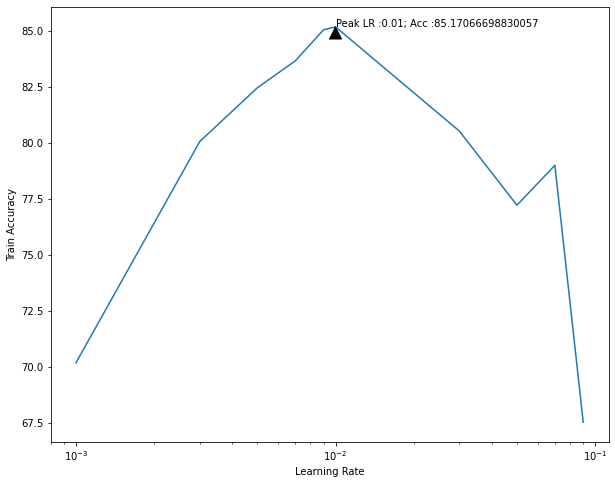

LRs used for range  test :  [0.001, 0.003, 0.005, 0.007, 0.009000000000000001, 0.01, 0.03, 0.05, 0.07, 0.09]
Train Accuracies :  [70.19659872150525, 80.06271861054155, 82.45688095525269, 83.65697744542275, 85.04402364009167, 85.17066698830057, 80.5270775539742, 77.22228922928477, 79.00132673983838, 67.54914968037632]
Test acc:  85.17066698830057 LR:  0.01


In [15]:
import warnings
warnings.filterwarnings("ignore")
lrs = [j*(10**i) for i in range(-3,-1) for j in range(1,11,2)]

lr_range_test(lrs,model,device,train_loader, test_loader)

  0%|          | 0/130 [00:00<?, ?it/s]

Epoch: 1 Learning_Rate 0.0009999999999999992


Loss=0.5164838433265686 Batch_id=129 Accuracy=71.60: 100%|██████████| 130/130 [04:29<00:00,  2.07s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.4166, Accuracy: 3460/4148 (83.41%)

Epoch: 2 Learning_Rate 0.001859423525312735


Loss=0.42184820771217346 Batch_id=129 Accuracy=81.41: 100%|██████████| 130/130 [04:30<00:00,  2.08s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3747, Accuracy: 3514/4148 (84.72%)

Epoch: 3 Learning_Rate 0.004109423525312736


Loss=0.3721180558204651 Batch_id=129 Accuracy=83.08: 100%|██████████| 130/130 [04:31<00:00,  2.09s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3982, Accuracy: 3499/4148 (84.35%)

Epoch: 4 Learning_Rate 0.006890576474687262


Loss=0.3280625343322754 Batch_id=129 Accuracy=84.09: 100%|██████████| 130/130 [04:34<00:00,  2.12s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3286, Accuracy: 3592/4148 (86.60%)

Epoch: 5 Learning_Rate 0.009140576474687263


Loss=0.6872739791870117 Batch_id=129 Accuracy=85.72: 100%|██████████| 130/130 [04:32<00:00,  2.10s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3190, Accuracy: 3642/4148 (87.80%)

Epoch: 6 Learning_Rate 0.01


Loss=0.7217599153518677 Batch_id=129 Accuracy=86.58: 100%|██████████| 130/130 [04:31<00:00,  2.09s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.3101, Accuracy: 3646/4148 (87.90%)

Epoch: 7 Learning_Rate 0.009887175604818207


Loss=0.3188289403915405 Batch_id=129 Accuracy=87.15: 100%|██████████| 130/130 [04:32<00:00,  2.10s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2933, Accuracy: 3665/4148 (88.36%)

Epoch: 8 Learning_Rate 0.009554359905560885


Loss=0.3234480321407318 Batch_id=129 Accuracy=88.10: 100%|██████████| 130/130 [04:35<00:00,  2.12s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2886, Accuracy: 3719/4148 (89.66%)

Epoch: 9 Learning_Rate 0.009018241671106136


Loss=0.1682697832584381 Batch_id=129 Accuracy=88.85: 100%|██████████| 130/130 [04:34<00:00,  2.12s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2744, Accuracy: 3716/4148 (89.59%)

Epoch: 10 Learning_Rate 0.008305704108364302


Loss=0.2858824133872986 Batch_id=129 Accuracy=89.43: 100%|██████████| 130/130 [04:37<00:00,  2.14s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2825, Accuracy: 3714/4148 (89.54%)

Epoch: 11 Learning_Rate 0.007452476826029012


Loss=0.27279677987098694 Batch_id=129 Accuracy=90.43: 100%|██████████| 130/130 [04:34<00:00,  2.11s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2690, Accuracy: 3715/4148 (89.56%)

Epoch: 12 Learning_Rate 0.006501344202803416


Loss=0.22080715000629425 Batch_id=129 Accuracy=90.53: 100%|██████████| 130/130 [04:38<00:00,  2.14s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2823, Accuracy: 3726/4148 (89.83%)

Epoch: 13 Learning_Rate 0.0055000000000000005


Loss=0.17346885800361633 Batch_id=129 Accuracy=90.72: 100%|██████████| 130/130 [04:39<00:00,  2.15s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2635, Accuracy: 3777/4148 (91.06%)

Epoch: 14 Learning_Rate 0.0044986557971965855


Loss=0.24952852725982666 Batch_id=129 Accuracy=91.76: 100%|██████████| 130/130 [04:34<00:00,  2.11s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2700, Accuracy: 3754/4148 (90.50%)

Epoch: 15 Learning_Rate 0.003547523173970989


Loss=0.31207215785980225 Batch_id=129 Accuracy=92.23: 100%|██████████| 130/130 [04:38<00:00,  2.14s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2699, Accuracy: 3757/4148 (90.57%)

Epoch: 16 Learning_Rate 0.0026942958916356995


Loss=0.2009749859571457 Batch_id=129 Accuracy=92.45: 100%|██████████| 130/130 [04:33<00:00,  2.10s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2861, Accuracy: 3759/4148 (90.62%)

Epoch: 17 Learning_Rate 0.0019817583288938663


Loss=0.18129047751426697 Batch_id=129 Accuracy=93.01: 100%|██████████| 130/130 [04:33<00:00,  2.11s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2755, Accuracy: 3759/4148 (90.62%)

Epoch: 18 Learning_Rate 0.0014456400944391143


Loss=0.2059451788663864 Batch_id=129 Accuracy=93.55: 100%|██████████| 130/130 [04:37<00:00,  2.13s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2637, Accuracy: 3778/4148 (91.08%)

Epoch: 19 Learning_Rate 0.0011128243951817936


Loss=0.15859751403331757 Batch_id=129 Accuracy=93.67: 100%|██████████| 130/130 [04:33<00:00,  2.11s/it]
  0%|          | 0/130 [00:00<?, ?it/s]


Test set: Average loss: 0.2820, Accuracy: 3764/4148 (90.74%)

Epoch: 20 Learning_Rate 0.001


Loss=0.21631033718585968 Batch_id=129 Accuracy=93.76: 100%|██████████| 130/130 [04:34<00:00,  2.11s/it]



Test set: Average loss: 0.2856, Accuracy: 3765/4148 (90.77%)



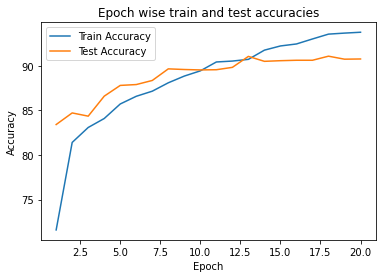

In [ ]:
total_epochs = 20
optimizer = optim.SGD(model.parameters(), lr=0.01,  momentum=0.9)
scheduler = OneCycleLR(optimizer, max_lr=0.01,  total_steps=total_epochs, pct_start=0.3, final_div_factor=1, div_factor=10)

fit_generator(model, device, train_loader, test_loader, optimizer, scheduler, start_epoch = 1, num_epoch = total_epochs, plot_acc = True)


In [ ]:
## Save Model
model.eval()
traced_model = torch.jit.trace(model,torch.randn(1,3,244,244))
traced_model.save("/content/drive/My Drive/EVA4P2/S2/Sess2_mobilenetv2_4.pt")
files.download("/content/drive/My Drive/EVA4P2/S2/Sess2_mobilenetv2_4.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
## Load Model
model = torch.jit.load('/content/drive/My Drive/EVA4P2/S2/Sess2_mobilenetv2_4.pt')
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model = model.to(device)

['Large QuadCopters', 'Flying Birds', 'Small QuadCopters', 'Winged Drones']


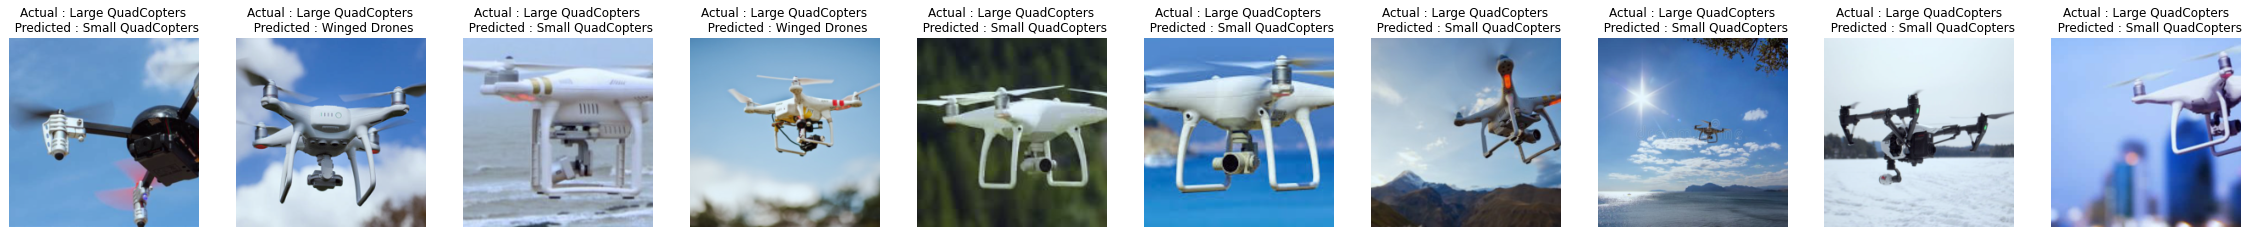

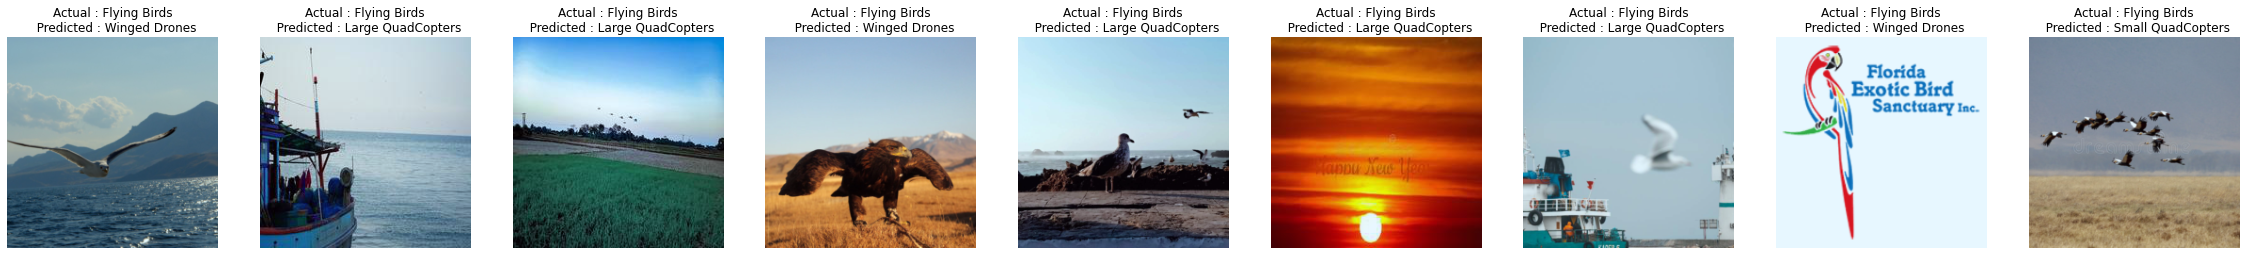

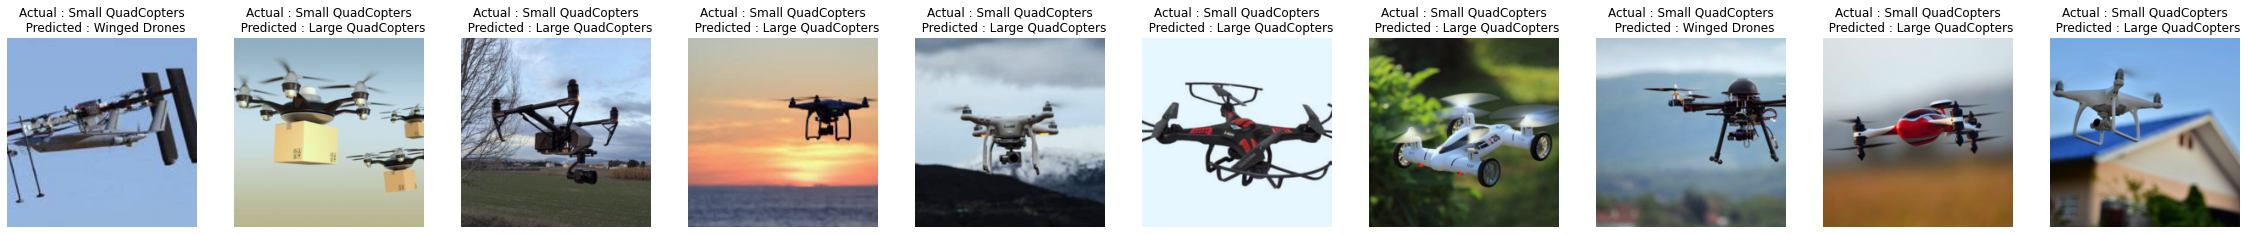

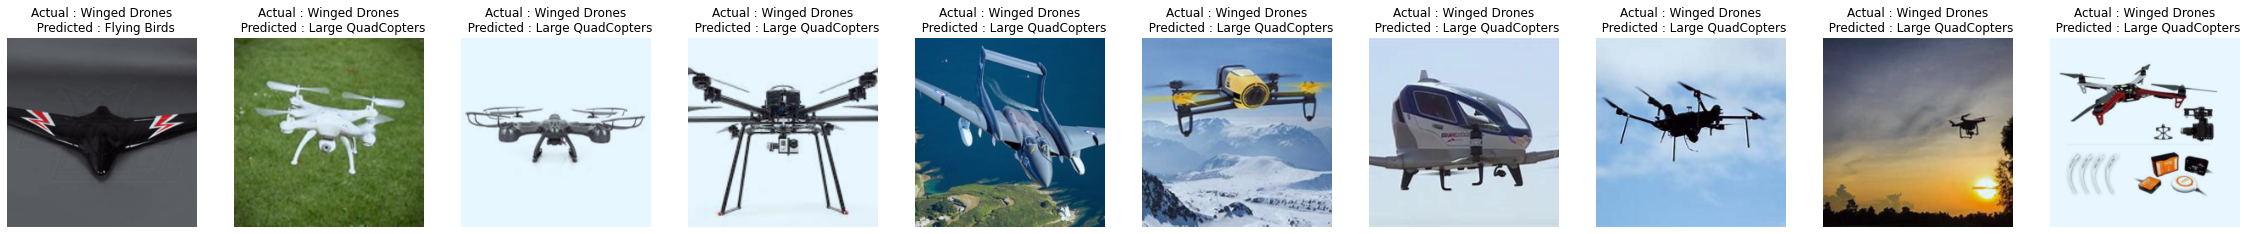

In [11]:
## Print Misclassified Images

n = 10
labels = pd.read_csv('/content/drive/My Drive/EVA4P2/S2/labels.csv')
labels_list = list(labels['Label'])
print(labels_list)

print_misclassified(model, device, test_loader, n, labels_list)
